# ESDC Application

In [10]:
import sys

sys.path.insert(0, '/home/emmanuel/code/py_esdc')
sys.path.insert(0, '/home/emmanuel/projects/2019_sakame/')

# Standard libraries
import xarray as xr
import numpy as np
import pandas as pd
import h5py

# SVM Model and Derivative functions
from src.models.classification import svm_naive
from src.models.derivatives import SVMDerivative

# Visualization
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
xr.set_options(display_style='html')
plt.style.use('ggplot')

# notebook extensions
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [2]:
filename = '/media/disk/databases/ESDC/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr'

datacube = xr.open_zarr(filename)

datacube = datacube[['gross_primary_productivity', 'root_moisture']]

# Extract time period
datacube = datacube.sel(time=slice(str(2008), str(2010))) #.resample(time='1MS').mean(dim='time', skipna=True)

# Extract russian, european region
cube_russia = datacube.sel(lat = slice(66.75, 48.25), lon = slice(28.75, 60.25))
cube_eu = datacube.sel(lat = slice(70.,30.), lon = slice(-20.,35.))

In [3]:
cube_russia

,Array,Chunk
Bytes,5.15 MB,37.30 kB
Shape,"(138, 74, 126)","(1, 74, 126)"
Count,1979 Tasks,138 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.15 MB,37.30 kB
Shape,"(138, 74, 126)","(1, 74, 126)"
Count,1979 Tasks,138 Chunks
Type,float32,numpy.ndarray


#### Visualize

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


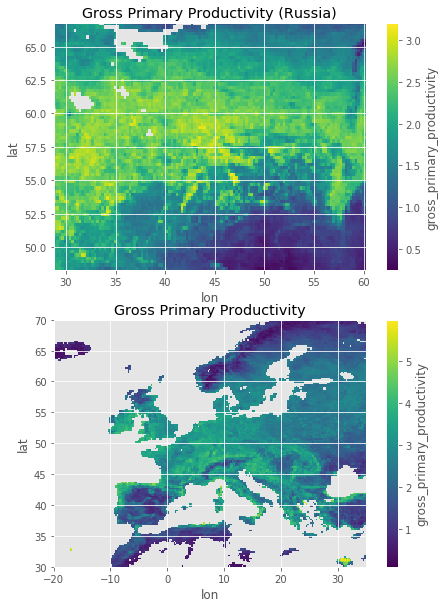

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(7,10))

cube_russia.gross_primary_productivity.sel(time=slice(str(2009), str(2009))).mean(dim='time').plot.imshow(ax=ax[0], cmap='viridis', robust=False)
ax[0].set_title('Gross Primary Productivity (Russia)')

cube_eu.gross_primary_productivity.sel(time=slice(str(2009), str(2009))).mean(dim='time').plot.imshow(ax=ax[1], cmap='viridis', robust=False)
ax[1].set_title('Gross Primary Productivity')

plt.show()

### Russian Drought

In [5]:
PATH = "/home/emmanuel/projects/2019_sakame/data/raw/"

In [6]:
rhw_duration = xr.open_dataarray(PATH + 'RHW_duration.nc')
rhw_gpp = xr.open_dataarray(PATH + "RHW_GPP.nc")
rhw_duration

<xarray.DataArray 'duration' (lat: 148, lon: 314)>
array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')
Coordinates:
  * lon      (lon) float64 9.969e+36 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * lat      (lat) float64 9.969e+36 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Attributes:
    longname:  Duration of the Russian Heatwave (days)

In [7]:
np.unique(rhw_gpp.lon.data)

array([9.96920997e+36])

In [8]:
np.unique(rhw_duration.data)

array(['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
      dtype='timedelta64[ns]')

In [9]:
!ls /home/emmanuel/projects/2019_sakame/data/raw/

RHW_duration.nc  RHW_GPP.nc


## Algorithm

### Support Vector Machine

In [13]:
svm_naive?

Signature: svm_naive(X_train, y_train, n_grid: numpy.ndarray = 20, **kwargs)
Docstring:
Naive implementation of the Support Vector Machine
classifcation function in the scikit-learn package. It
returns all of the necessary things needed to analyze the
results and possibly reuse the trained SVC model.

Parameters
----------
X_train : array, (N x D)
      an array of training points

y_train : array, (N x 1)
      an array of labels for the training points

n_grid : int, default=100
      the number of grid points to use for the parameter grid

kwargs : dict
      a dictionary of keyword arguments to use for the gridsearch. 
      Please see the sklearn.svm.SVC function for more details
      on the available arguments

Returns
-------

model : class,
      a class of the SVMModel.

Information
-----------
Author: J. Emmanuel Johnson
Email : jej2744@rit.edu
      : emanjohnson91@gmail.com
Date  : 11th April, 2017
File:      ~/projects/2019_sakame/src/models/classification.py
Type:      f

In [ ]:
# fit SVM model
svm_model = svm_naive(
    X_train=Xdata['train'],
    y_train=ydata['train'],
    X_test=Xdata['test'],
    n_grid=30
)

svm_model

### Predictions

### Derivative 

### Demo: Predicting Drought